In [11]:
import pandas as pd
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np

In [12]:
X,y = load_svmlight_file("C:/Users/zhancongcong/Desktop/MLdata/australian_scale.txt")

X = X.toarray()
print(X.shape)

(690, 14)


In [13]:
X = np.c_[np.ones((X.shape[0],1)),X]
X.shape #添加一列全1

(690, 15)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) #分割训练集和验证集

准确率为：
0.8728070175438597


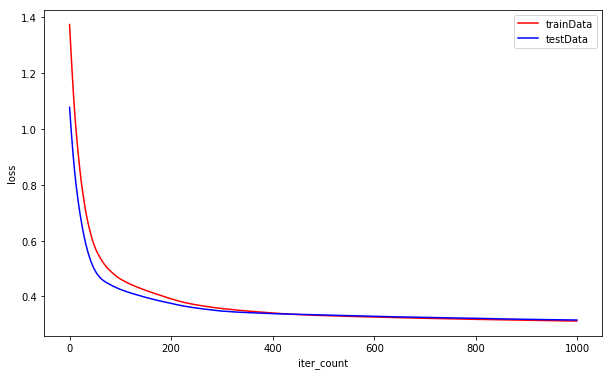

In [18]:
import numpy as np

def svm(samples, y, samples_t, y_t, step_size=0.0001, max_iter_count=1000, C=0.9):  #梯度下降
    sample_num, dim = samples.shape
    sample_num_t, dim = samples_t.shape
    LOSS = [] #训练集的loss
    LOSS_T = [] #验证集的loss
    w = np.ones((dim,), dtype=np.float32)
    loss = 10 
    iter_count = 0
    while loss > 0.001 and iter_count < max_iter_count:
        loss = 0
        loss_t = 0
        error = np.zeros((dim,), dtype=np.float32) #初始化梯度
        for i in range(sample_num):
            flag = 1-y[i]*(np.dot(w, samples[i]))
            if flag>=0:                 
                for j in range(dim):
                    error[j] += samples[i][j]*y[i]                          
        for j in range(dim):
            w[j] -= step_size * (w[j]-C*error[j]) #更新w
        for i in range(sample_num):
            flag = 1-y[i]*(np.dot(w, samples[i]))
            if flag>=0:
                error = 1-y[i]*(np.dot(w, samples[i])) #每个没被正确分类样本的loss
                loss += error     
        loss = C*loss + 0.5*(np.dot(w, w))    #训练集loss    
        LOSS.append(loss/sample_num)        
        for i in range(sample_num_t):
            flag = 1-y_t[i]*(np.dot(w, samples_t[i]))
            if flag>=0:
                error_t = 1-y_t[i]*(np.dot(w, samples_t[i]))
                loss_t += error_t     
        loss_t = C*loss_t + 0.5*(np.dot(w, w))   #验证集loss   
        LOSS_T.append(loss_t/sample_num_t)
        iter_count+=1;
    return w,LOSS,LOSS_T

import matplotlib.pyplot as plt
if __name__ == '__main__': 
    w,LOSS,LOSS_T = svm(X_train, y_train, X_test, y_test)      
    count1=0
    for i in range(X_test.shape[0]):
        w_x = np.dot(w, X_test[i])
        if y_test[i]==1 and w_x>0:
            count1+=1
        if y_test[i]==-1 and w_x<0:
            count1+=1
    print("准确率为：") 
    print(count1/X_test.shape[0])
    plt.figure(figsize=(10,6))
    plt.plot( LOSS, 'r', label="trainData")
    plt.plot( LOSS_T, 'b', label="testData")
    plt.xlabel('iter_count')  
    plt.ylabel('loss')
    plt.legend()
    plt.show()